# PM Homework 5

**FBA Quant 이의형**

---

## Assignment 1. Summarize Text Book

- [Quantitative Portfolio Management in Python] Chap 3. The Markowitz Framework

## Chap 3. The Markowitz Framework

### 3.1 Investment and Self-Fainancing Portfolios

**3.1.1 Notations and Definitions**  

$d$: 위험 자산 개수  
$\pi$: 자산 비중  
$x_0$: 초기 자산    

$S_t^i$: 시간 $t$에서 자산 $i$의 가치 (시간은 일단 0과 $T$만 고려)  
$q_i$: 시간 0에서 들고 있는 주식 수 (음수면 숏)  
$R_T^i$: 시간 0~$T$ 사이 자산 $i$의 수익률  
$R_T$: 자산들의 수익률 벡터  
$M$: 자산들의 기대 수익률 벡터 ($E(R_T)$)  
$\Sigma$: 공분산 행렬  

**포트폴리오 타입**
- self-financing portfolio: 롱 포지션의 비용을 숏 포지션에서 확보 (초기 자본 필요 없음)
- investment portfolio: 롱과 숏 모두 하더라도 포트폴리오 생성 비용 필요  

숏 포지션 시 주식 빌려 바로 매도 후 현금 창출 -> 시점 T에서 시장 가격으로 매입하여 상환 (이 경우, 순현금흐름은 $S_0^i-S_T^i$)


**3.1.2 Representations of the Portfolios**

$$\text {investment portfolio}: \sum_{i=1}^{i=d} q_i S_0^i > 0$$

$$\text {self-financing portfolio}: \sum_{i=1}^{i=d} q_i S_0^i = 0$$

property 3.1.1, 3.1.2의 성질들로
- investment portfolio: $\displaystyle \sum_{i=1}^{i=d} \pi_i = 1$
- self-financing portfolio: $\displaystyle \sum_{i=1}^{i=d} \pi_i = 0$

시점 0의 포트폴리오 가치: $W_0(x_0, \pi)$  
시점 0의 포트폴리오 가치: $W_T(x_T, \pi)$  

self-financing portfolio $(x_0, \pi_1, ..., \pi_d)$에 대하여 $x_0$는 notional이라 불린다.

**3.1.3 Returns of a Portfolio**

$$R_T(\pi) = \frac {W_T(x_0, \pi) - W_0(x_0, \pi)} {x_0} \quad (\text {self-financing의 경우 $W_0$ 텀은 없어도 됨.}) \;\;  = \sum_{i=1}^{i=d} \pi_i R_T^i$$

- $ R_T(\pi) = \pi'R_T$  
- $ E(R_T(\pi)) = E(\pi'R_T)$  
- $\text {Cov} (R_T(\pi_P), R_T(\pi_Q)) = \pi'_P \text {Cov} (R_T, R_T) \pi_Q$ (2개의 포트폴리오 $\pi_P$와 $\pi_Q$를 고려할 때) (??)  
　  

$\sigma_\pi = \sigma(R_T(\pi))$: 전략 $\pi$의 수익률의 표준편차  
$m_\pi = E(R_T(\pi))$: 전략 $\pi$의 기대 수익률


### 3.2 Absence of Arbitrage Opportunuties (AAO)

차익거래 기회의 부재 조건을 정의
- 위험자산 공분산 행렬의 invertibility를 의미  

**AAO 조건**
- 두 무위험 투자 전략이 존재하는 경우, 수익률은 동일하다. (경제에서 두 개의 명백한 무위험 이자율이 존재하는 것은 불가능)
- self-financing 전략의 리스크가 없다면, 수익률은 0이다. (무에서 유를 창조하는 것은 불가능)

**$\Sigma$가 가역이면**
- 위험 자산으로 구성된 경제에 대해 AAO 조건 충족 (det?)
- 수익률 $r_0$ 무위험 자산이 추가되어도 AAO 조건 충족

$\Sigma$가 가역이 아니면 리스크 없는 포트폴리오를 구성할 수 있다.  

모델은 항상 $\Sigma$가 가역이라는 가설을 세우며, 이 경우 AAO 조건이 충족된다.  

우리는 무위험 자산이 없는 경제와 있는 경제 두 가지를 살펴볼 것

### 3.3 Multidimensional Estimations

**Wishart Distribution**

$X_i \; \text ~ \; N(0,\; \sum_d) i.i.d$이면 $\displaystyle \sum_{i=1}^{i=n} X_i X_i'$는 $n$의 자유도를 가진 Wishart Distribution

$\sum_{i=1}^{i=n} X_i X_i' \; \text ~ \; W(n,\;\sum_d)$  

$d=1$일 때, Wishart 분포는 카이제곱 분포와 일치 (Wishart 분포는 카이제곱 분포를 행렬 공간으로 일반화)

**Hotelling's $T^2$ Distribution**  

$nX'W^{-1}X \text ~ T^2_d(n)$

**Fisher-Snedecor Distributions**  

$\displaystyle \frac {\chi_1/d_1} {\chi_2/d_2}$

---

## Assignment 2. Implementing in Python

---

### Problem 1.

Clone (or Refactoring) the code from '3.4 Market Data with Python' and try running it to see the actual output.  
(When loading the data, use the yfinance library and select the tickers  ['DHL.DE', 'ALV.DE'].)  

In [1]:
import pandas as pd
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

from scipy import stats
import yfinance as yf


Tickers = ['DHL.DE', 'ALV.DE']
startinput = '2017-01-01'
endinput = '2017-12-31'

S = pd.DataFrame()
for t in Tickers: 
    S[t] = yf.download(t, start=startinput, end=endinput)['Close']
S

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,DHL.DE,ALV.DE
Date,,
2017-01-02,31.400000,157.300003
2017-01-03,31.500000,159.550003
2017-01-04,31.325001,160.399994
2017-01-05,31.855000,160.699997
2017-01-06,31.870001,161.100006
...,...,...
2017-12-21,40.705002,196.250000
2017-12-22,40.494999,195.250000
2017-12-27,40.610001,194.100006


In [2]:
R = S.pct_change()[1:]
Mean = R.mean()
Covar = R.cov()
Mean, Covar

(DHL.DE    0.000988
 ALV.DE    0.000817
 dtype: float64,
           DHL.DE    ALV.DE
 DHL.DE  0.000097  0.000045
 ALV.DE  0.000045  0.000066)

In [3]:
n = len(R)
d = len(Tickers)
alpha_conf = 0.95
dist = stats.f(d, n - d)  # F 분포
[a, b] = dist.interval(2 * alpha_conf - 1)
q = float(d) / float(n - d) * float(b)

startdate = pd.to_datetime(startinput).date()
enddate = pd.to_datetime(endinput).date()
Duration = (enddate - startdate).days
m = float(len(R) - 1)
delta_t = Duration / 365 * m

w, v = LA.eig(Covar)
arg = np.linspace(0, 2 * np.pi, 100)
x = np.cos(arg) * np.sqrt(q * w[0]) * v.T[0][0] + np.sin(arg) * np.sqrt(q * w[1]) * v.T[1][0] + Mean[0]
y = np.cos(arg) * np.sqrt(q * w[0]) * v.T[0][1] + np.sin(arg) * np.sqrt(q * w[1]) * v.T[1][1] + Mean[1]
z1 = R['DHL.DE']
z2 = R['ALV.DE']

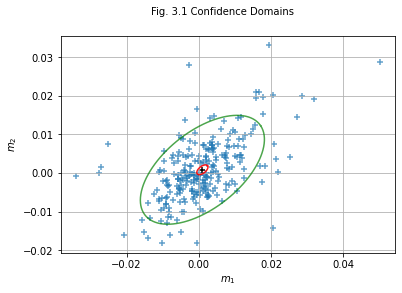

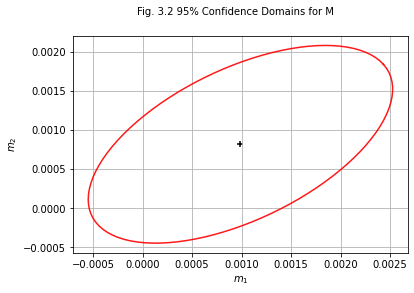

In [4]:
plt.scatter(z1, z2, marker='+', alpha=0.7)
plt.plot(x, y, alpha=0.9, color="red")
plt.scatter(Mean[0], Mean[1], color="black", marker='+')
plt.xlabel(r'$m_1$')
plt.ylabel(r'$m_2$')
plt.suptitle('Fig. 3.1 Confidence Domains', size='medium')
plt.grid()

beta = 0.95
distchi = stats.chi2(2)
Ea, Eb = dist.interval(2*beta-1)
p = Eb
Ex = np.cos(arg) * np.sqrt(p * w[0]) * v.T[0][0] + np.sin(arg) * np.sqrt(p * w[1]) * v.T[1][0] + Mean[0]
Ey = np.cos(arg) * np.sqrt(p * w[0]) * v.T[0][1] + np.sin(arg) * np.sqrt(p * w[1]) * v.T[1][1] + Mean[1]

plt.plot(Ex, Ey, alpha=0.7, color="green")
plt.show()

plt.plot(x, y, alpha=0.9, color="red")
plt.scatter(Mean[0], Mean[1], color="black", marker='+')
plt.xlabel(r'$m_1$')
plt.ylabel(r'$m_2$')
plt.suptitle('Fig. 3.2 95% Confidence Domains for M', size='medium')
plt.grid()
plt.show()

---

### Problem 2.

Select two desired assets and repeat the same process to generate the output.

In [5]:
import pandas as pd
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

from scipy import stats
import yfinance as yf


# Data extraction
Tickers = ['005930.ks', '000020.ks']
startinput = '2017-01-01'
endinput = '2017-12-31'

# Load Price Data
S = pd.DataFrame()
for t in Tickers: 
    S[t] = yf.download(t, start=startinput, end=endinput)['Close']
S

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,005930.ks,000020.ks
Date,,
2017-01-02,36100.0,8110.0
2017-01-03,36480.0,8110.0
2017-01-04,36160.0,8150.0
2017-01-05,35560.0,8210.0
2017-01-06,36200.0,8160.0
...,...,...
2017-12-21,49140.0,9320.0
2017-12-22,49700.0,9260.0
2017-12-26,48200.0,9370.0


In [6]:
R = S.pct_change()[1:]
Mean = R.mean()
Covar = R.cov()
Mean, Covar

(005930.ks    0.001553
 000020.ks    0.000921
 dtype: float64,
            005930.ks  000020.ks
 005930.ks   0.000232   0.000015
 000020.ks   0.000015   0.000310)

In [7]:
n = len(R)
d = len(Tickers)
alpha_conf = 0.95
dist = stats.f(d, n - d)  # F 분포
[a, b] = dist.interval(2 * alpha_conf - 1)
q = float(d) / float(n - d) * float(b)

startdate = pd.to_datetime(startinput).date()
enddate = pd.to_datetime(endinput).date()
Duration = (enddate - startdate).days
m = float(len(R) - 1)
delta_t = Duration / 365 * m

w, v = LA.eig(Covar)
arg = np.linspace(0, 2 * np.pi, 100)
x = np.cos(arg) * np.sqrt(q * w[0]) * v.T[0][0] + np.sin(arg) * np.sqrt(q * w[1]) * v.T[1][0] + Mean[0]
y = np.cos(arg) * np.sqrt(q * w[0]) * v.T[0][1] + np.sin(arg) * np.sqrt(q * w[1]) * v.T[1][1] + Mean[1]
z1 = R['005930.ks']
z2 = R['000020.ks']

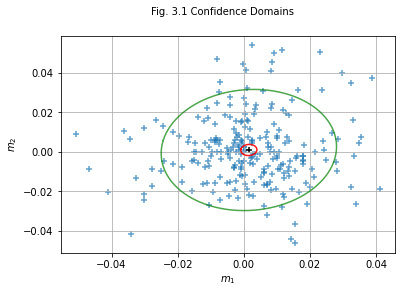

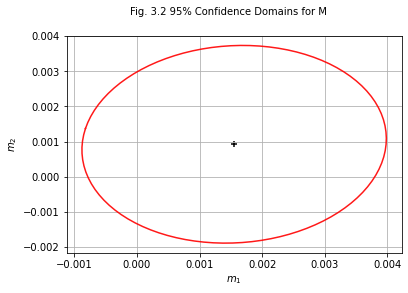

In [8]:
plt.scatter(z1, z2, marker='+', alpha=0.7)
plt.plot(x, y, alpha=0.9, color="red")
plt.scatter(Mean[0], Mean[1], color="black", marker='+')
plt.xlabel(r'$m_1$')
plt.ylabel(r'$m_2$')
plt.suptitle('Fig. 3.1 Confidence Domains', size='medium')
plt.grid()

beta = 0.95
distchi = stats.chi2(2)
Ea, Eb = dist.interval(2*beta-1)
p = Eb
Ex = np.cos(arg) * np.sqrt(p * w[0]) * v.T[0][0] + np.sin(arg) * np.sqrt(p * w[1]) * v.T[1][0] + Mean[0]
Ey = np.cos(arg) * np.sqrt(p * w[0]) * v.T[0][1] + np.sin(arg) * np.sqrt(p * w[1]) * v.T[1][1] + Mean[1]

plt.plot(Ex, Ey, alpha=0.7, color="green")
plt.show()

plt.plot(x, y, alpha=0.9, color="red")
plt.scatter(Mean[0], Mean[1], color="black", marker='+')
plt.xlabel(r'$m_1$')
plt.ylabel(r'$m_2$')
plt.suptitle('Fig. 3.2 95% Confidence Domains for M', size='medium')
plt.grid()
plt.show()

---